<a href="https://colab.research.google.com/github/yojulab/study_data_analytics/blob/main/docs%5Cvisuallization%5C03_visuallization_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

## loading dataset file and check dataframe

In [2]:
import pandas as pd

In [3]:
df_LCOCT = pd.read_csv('LetalCarOfContractType.csv')
df_LCOCT[100:104]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
100,66437196,렌탈,Promotion,서비스 방문,2019-10-21,60,CMS,K3,90900,계약확정,0,없음,2.0,농협은행,정상,29.0,1259.0
101,66420849,렌탈,Promotion,서비스 방문,2019-10-21,60,CMS,K2,90900,계약확정,0,없음,3.0,외환은행,정상,NaN,NaN
102,66758580,렌탈,Package,서비스 방문,2019-10-21,60,CMS,K1,134700,계약확정,0,없음,2.0,국민은행,정상,57.0,2262.0
103,66282355,렌탈,Extension_Rental,서비스 방문,2019-10-21,60,CMS,K1,96900,계약확정,0,없음,1.0,우리은행,정상,61.0,2497.0


In [4]:
df_LCOCT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [5]:
import seaborn as sns

## 다변수 시각화

### X : 범주 / y: 연속 : 설명변수 / 목표변수
- 막대 그래프 / 상자그림

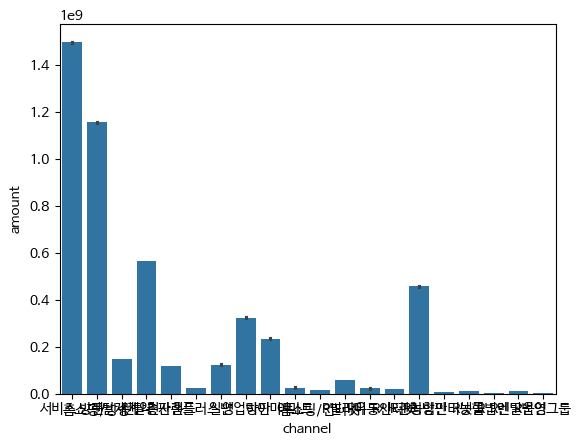

In [6]:
# 범주 : channel, 연속 : amount
# sns.barplot(data=df_LCOCT, x='channel', y='amount') # ~= count
sns.barplot(data=df_LCOCT, x='channel', y='amount', estimator=sum) #
plt.show()

#### 상위 5위인 범주만 전달

In [7]:
df_LCOCT_channel_amount_sum = pd.pivot_table(data=df_LCOCT, index='channel', values='amount', aggfunc='sum')
# df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False) # 정렬
# df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False).iloc[:5]  # 추출
# df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False).iloc[:5].index  # 추출
channel_amount_sum_5Rank = df_LCOCT_channel_amount_sum.sort_values(by='amount', ascending=False).iloc[:5].index.to_list()  # 데이터 타입 변환
channel_amount_sum_5Rank

['서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판', '영업방판']

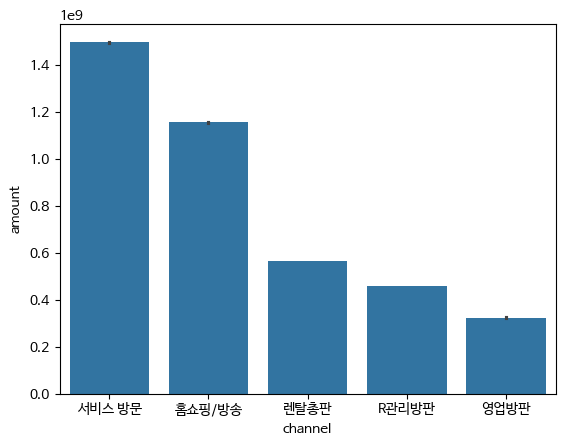

In [8]:
# sns.barplot(data=df_LCOCT, x='channel', y='amount', estimator=sum
#             ,order=['렌탈총판', 'R관리방판', '영업방판'])#
sns.barplot(data=df_LCOCT, x='channel', y='amount', estimator=sum
            ,order=channel_amount_sum_5Rank)#
plt.show()

#### 상위 5위인 dataframe 전달

In [9]:
df_LCOCT_channel_amount_sum_ = pd.pivot_table(data=df_LCOCT, index='channel', values='amount', aggfunc='sum')
df_LCOCT_channel_amount_sum_.reset_index(inplace=True)
df_LCOCT_channel_amount_sum_ = df_LCOCT_channel_amount_sum_.sort_values(by='amount', ascending=False)
df_LCOCT_channel_amount_sum_

,channel,amount
11,서비스 방문,1496420760
17,홈쇼핑/방송,1156173900
10,렌탈총판,565189800
0,R관리방판,458556039
12,영업방판,322955100
16,하이마트,234002706
9,렌탈재계약,147318600
14,일반,124029000
15,전자랜드,118252200
6,R빌리미,58267200


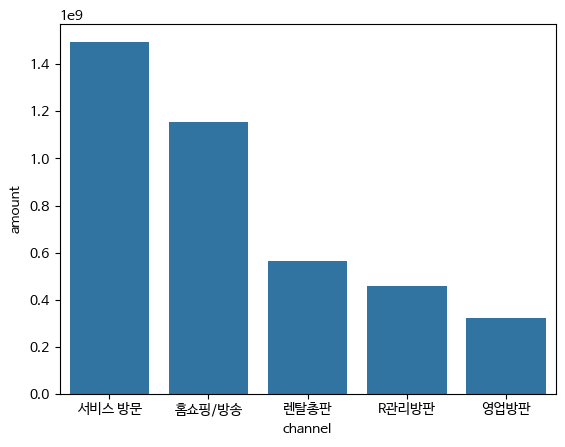

In [10]:
sns.barplot(data=df_LCOCT_channel_amount_sum_[:5], x='channel', y='amount')
plt.show()

##### boxplot
- 데이터 이상값 확인 시 사용 : 사전에 집계 함수 사용 않함

In [11]:
df_LCOCT.columns

Index(['id', 'type_of_contract', 'type_of_contract2', 'channel', 'datetime',
       'Term', 'payment_type', 'product', 'amount', 'state', 'overdue_count',
       'overdue', 'credit rating', 'bank', 'cancellation', 'age', 'Mileage'],
      dtype='object')

<Axes: xlabel='channel', ylabel='amount'>

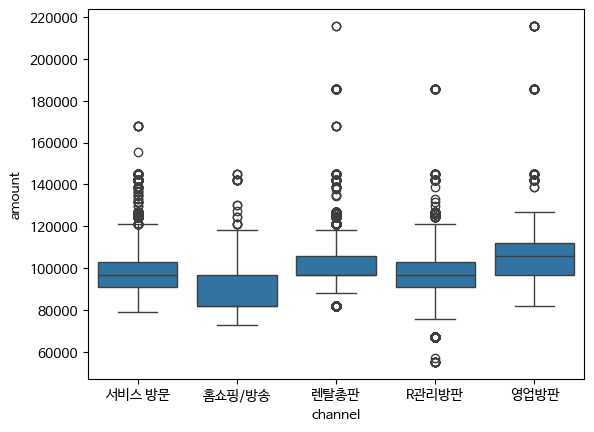

In [12]:
sns.boxplot(data=df_LCOCT, x='channel' , y='amount', order=channel_amount_sum_5Rank)

### X : 연속 / Y: 연속
- 산점도 / 회귀 그래프 / 히트맵

#### 산점도(scatterplot)

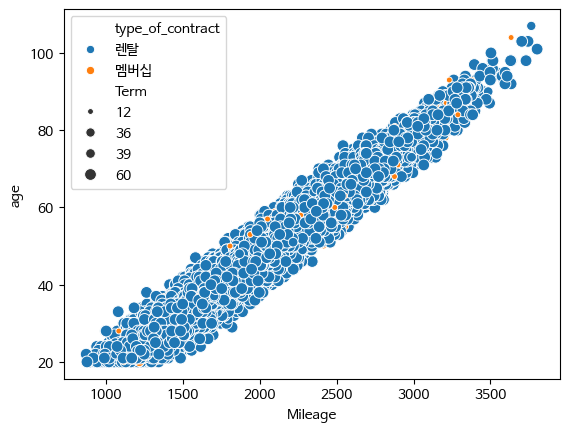

In [13]:
# sns.scatterplot(data=df_LCOCT, x='Mileage', y='age')  # 일반 산점도
sns.scatterplot(data=df_LCOCT, x='Mileage', y='age', hue='type_of_contract', size='Term')  #
plt.show()

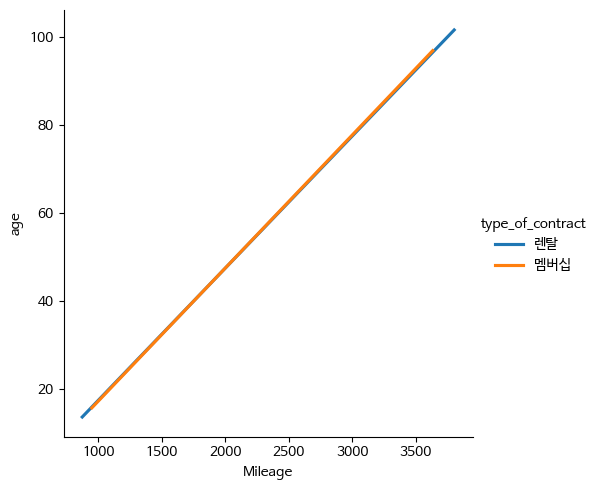

In [14]:
# sns.lmplot(data=df_LCOCT, x='Mileage', y='age', hue='type_of_contract')
sns.lmplot(data=df_LCOCT, x='Mileage', y='age', hue='type_of_contract', scatter=False)
plt.show()

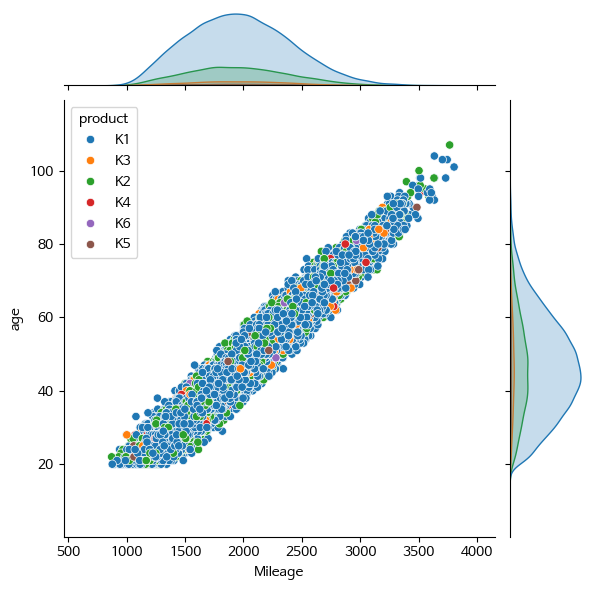

In [15]:
# sns.jointplot(data=df_LCOCT, x='Mileage', y='age', hue='type_of_contract')
sns.jointplot(data=df_LCOCT, x='Mileage', y='age', hue='product')
plt.show()

#### 상관관계 : correlation
- 변수간 관계성 보기 위해 지표 : 연속형(수치형) 묶어주는 정도
- -1 <= 0 <= 1 : 확률 표시

In [16]:
df_LCOCT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [17]:
# df_LCOCT.corr() # 수치형 데이터 타입 해당
df_LCOCT[['Term','amount', 'overdue_count', 'credit rating', 'age', 'Mileage']].corr() # 수치형 데이터 타입 해당

,Term,amount,overdue_count,credit rating,age,Mileage
Term,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


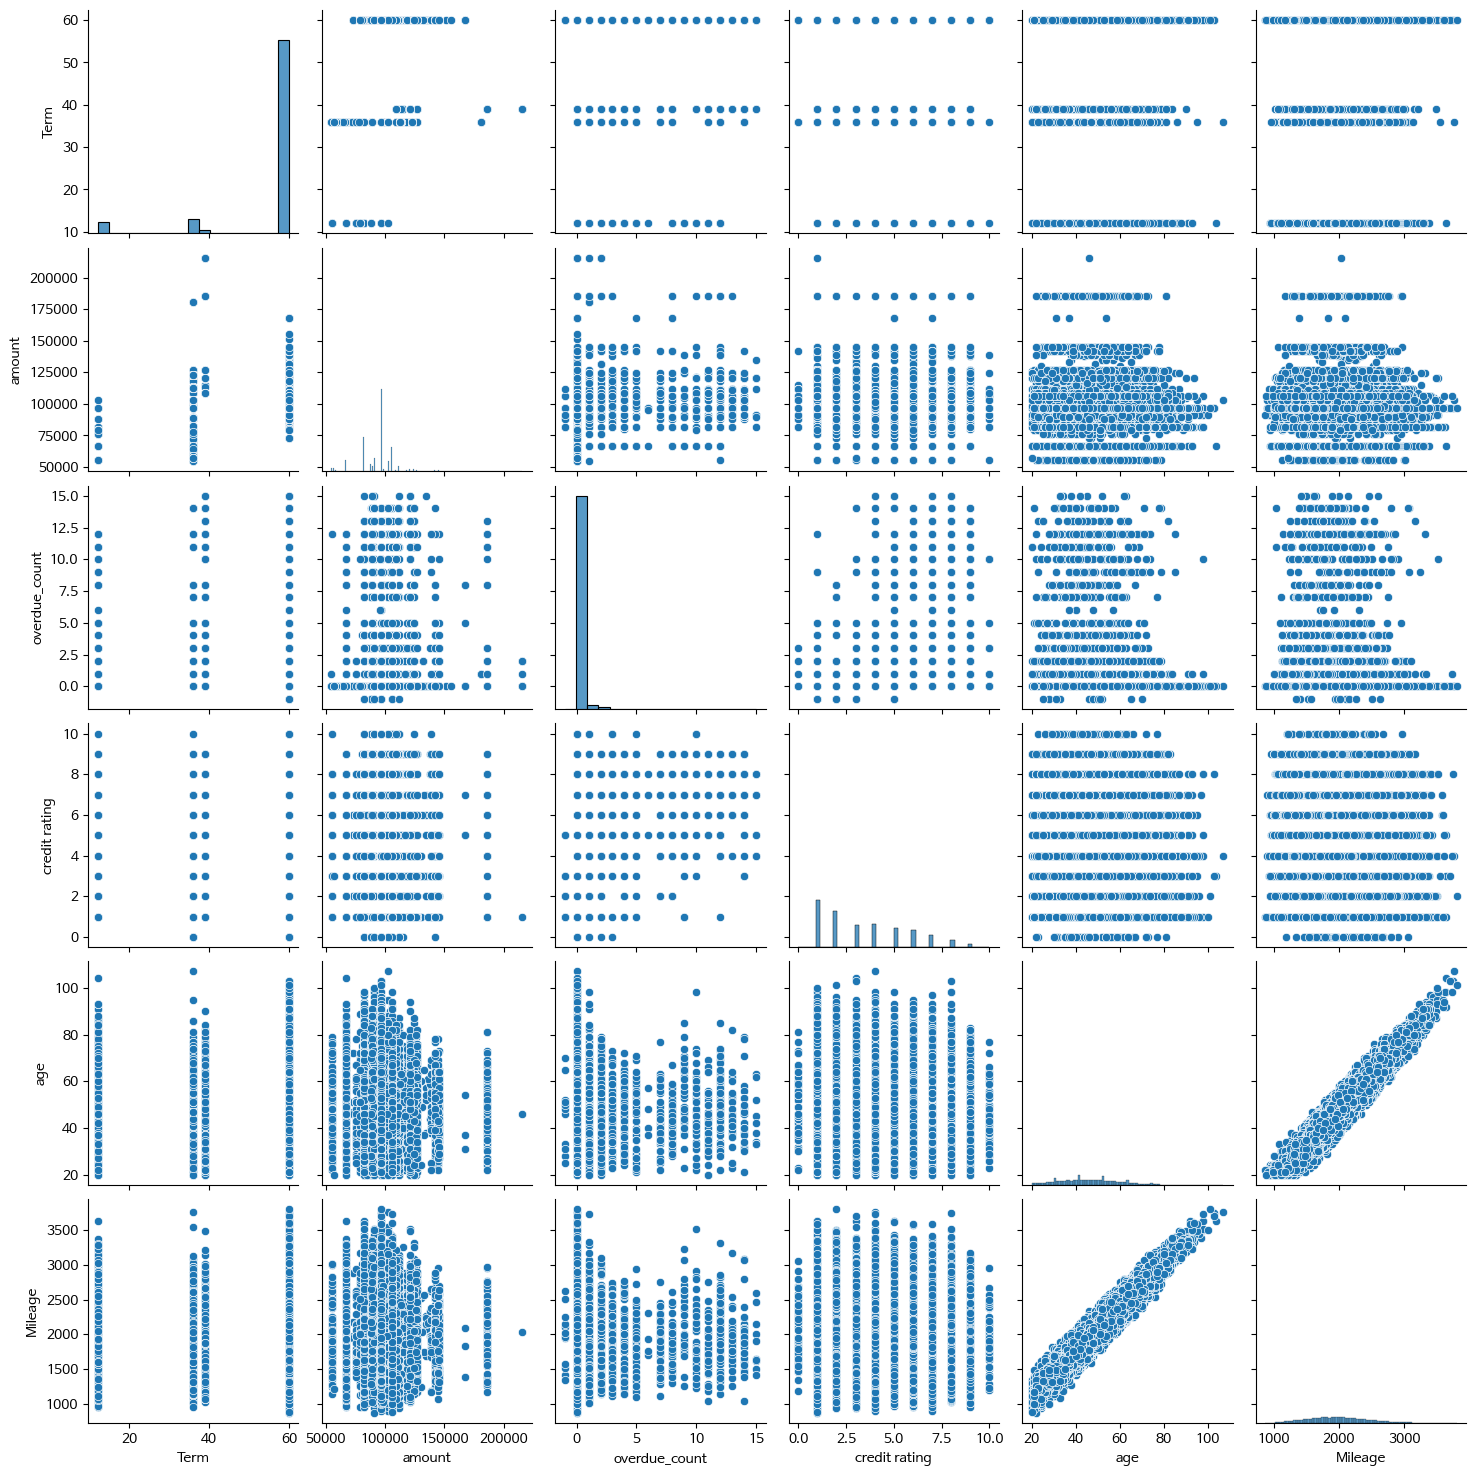

In [18]:
sns.pairplot(data=df_LCOCT[['Term','amount', 'overdue_count', 'credit rating', 'age', 'Mileage']])
plt.show()

## X : 시간(순서) / y: 연속

In [19]:
df_LCOCT['datetime_date'] = pd.to_datetime(df_LCOCT['datetime'])
df_LCOCT['datetime_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51304 entries, 0 to 51303
Series name: datetime_date
Non-Null Count  Dtype         
--------------  -----         
51304 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 400.9 KB


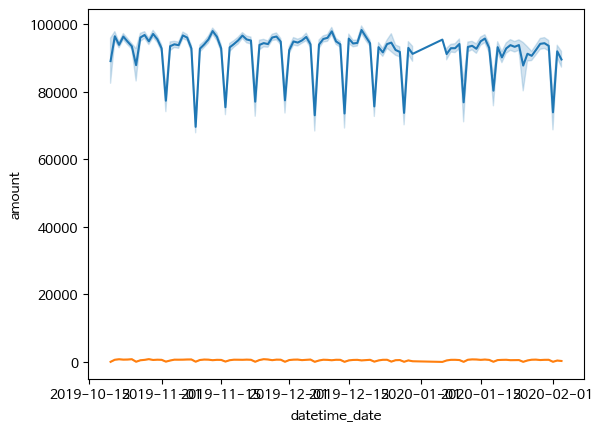

In [24]:
import numpy as np

sns.lineplot(data=df_LCOCT, x='datetime_date', y='amount', estimator=np.mean)  # mean 이 디폴트값
sns.lineplot(data=df_LCOCT, x='datetime_date', y='amount', estimator=len)  # row 갯수
# sns.lineplot(data=df_LCOCT, x='datetime_date', y='amount', estimator=sum)
plt.show()

In [21]:
df_LCOCT['datetime_day_name'] = df_LCOCT['datetime_date'].dt.day_name() #주단위로 확인

In [22]:
# df_LCOCT.iloc[:500].to_csv('LetalCarOfContractType_500.csv')